In [1]:
#%matplotlib inline

# Import all the programs we want to use. If this gives an error, then you need to add these to your python path.

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
#import holopy as hp
import os
#import av
import scipy
import scipy.optimize as sco
import seaborn as sns

%pylab inline 
# tell python how to display images

#%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
scaling =  0.08431 #um/pixel
mpp = scaling
fps = 11.935
moviename = 'tracer+janus_3%_H2O2_5(green)2016-06-14'

In [3]:
1/fps

0.0837871805613741

In [4]:
os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\analysis')

In [5]:
t1 = pd.read_pickle('filtered_data_tracer+janus_3%_H2O2_5(green)2016-06-14_pickled.pkl')

In [6]:
tm = pd.read_pickle('filtered_data_with_drift_subtracted_tracer+janus_3%_H2O2_5(green)2016-06-14_pickled.pkl')

In [7]:
fpscontrol = 11.959
t1control = pd.read_pickle('filtered_data_tracer+janus_no_H2O2_3(red)2016-06-14_pickled.pkl')

In [8]:
tmcontrolfilename = 'filtered_data_with_drift_subtracted_tracer+janus_no_H2O2_3(red)2016-06-14_pickled.pkl'
tmcontrol = pd.read_pickle(tmcontrolfilename)

controlmoviename = 'tracer+janus_no_H2O2_3(red)2016-06-14'

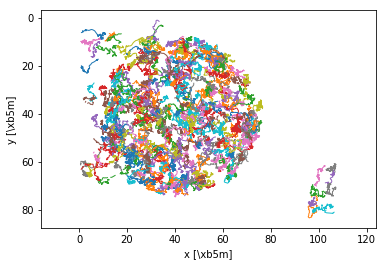

In [9]:
plt.axis('equal')
ax = tp.plot_traj(t1, mpp = scaling, legend=False)

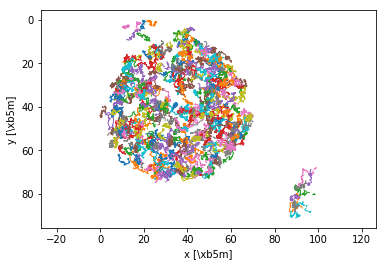

In [10]:
plt.axis('equal')
ax = tp.plot_traj(tm, mpp = scaling, legend=False)


C:\ProgramData\Anaconda2\lib\site-packages\trackpy\motion.py:270: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=0,window=15,center=False).mean()
  dx = pd.rolling_mean(dx, smoothing, min_periods=0)


Text(0,0.5,u'pixels')

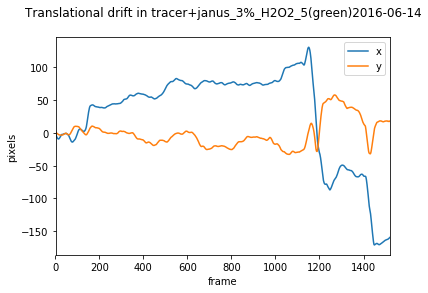

In [11]:
d = tp.compute_drift(t1, smoothing=15)

#plt.figure()
d.plot(grid=False)
plt.title('Translational drift in ' + moviename + '\n')
plt.ylabel('pixels')

In [12]:
d.head()

,x,y
frame,,
1,-1.338733,0.463211
2,-2.283690,0.870435
3,-3.212503,0.981969
4,-4.226901,0.651283
5,-5.206964,0.156092


In [13]:
dmicrons= d*mpp
dmicrons.index = d.index /fps
dmicrons.index.name = 'time (s)'
dmicrons.head()

,x,y
time (s),,
0.083787,-0.112869,0.039053
0.167574,-0.192538,0.073386
0.251362,-0.270846,0.082790
0.335149,-0.356370,0.054910
0.418936,-0.438999,0.013160


Text(0,0.5,u'Ensemble translational drift ($\\mathrm{\\mu}$m)')

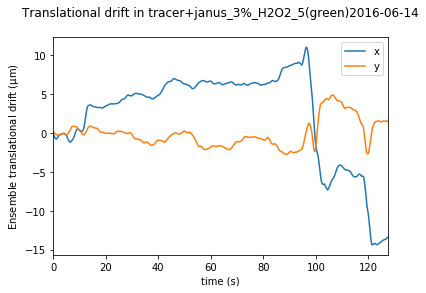

In [14]:
dmicrons.plot()
plt.title('Translational drift in ' + moviename + '\n')
plt.ylabel('Ensemble translational drift ($\mathrm{\mu}$m)')

In [49]:
print(dmicrons.index[0] == 1/fps)
1/fps

True


0.0837871805613741

Text(1,1,u'$\\Delta{}t = 0.0838$ sec')

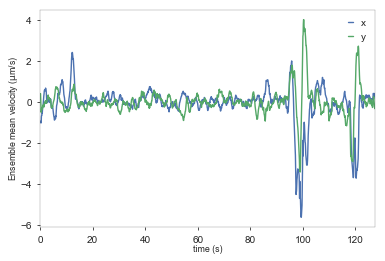

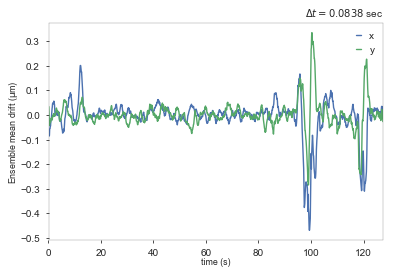

In [51]:
drift = dmicrons.diff()
velocitydf = (dmicrons.diff()/ (1/fps))
velocitydf.plot()
#xlabel('Time (s)')
ylabel("Ensemble mean velocity ($\mathrm{\mu}$m/s)")

pltdrift.plot()
ylabel("Ensemble mean drift ($\mathrm{\mu}$m)")
title("$\Delta{}t = 0.0838$ sec", loc='right').figure()
drift.plot()
ylabel("Ensemble mean drift ($\mathrm{\mu}$m)")
title("$\Delta{}t = 0.0838$ sec", loc='right')

In [63]:
velocitydf['speed'] = sqrt(velocitydf.x**2 + velocitydf.y**2)

Text(1,1,u'$\\Delta{}t = 0.0838$ sec')

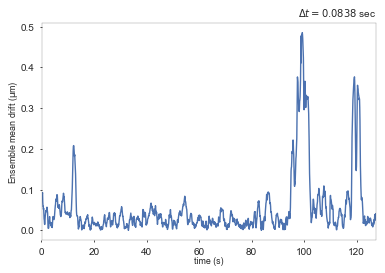

In [60]:
drift['distance']=sqrt(drift.x**2 + drift.y**2)


drift.distance.plot()
ylabel("Ensemble mean drift ($\mathrm{\mu}$m)")
plt.title("$\Delta{}t = 0.0838$ sec", loc='right')
ylabel("Ensemble mean drift ($\mathrm{\mu}$m)")
title("$\Delta{}t = 0.0838$ sec", loc='right')

In [59]:
drift.describe()

,x,y,distance
count,1521.000000,1521.000000,1521.000000
mean,-0.008725,0.000917,0.054457
std,0.077369,0.057259,0.079838
min,-0.469474,-0.284691,0.000170
25%,-0.014459,-0.017953,0.015796
50%,0.002949,-0.002240,0.028795
75%,0.019397,0.014553,0.050920
max,0.201745,0.335312,0.485223


In [18]:
velocitydf.describe()

,x,y,speed
count,1521.000000,1521.000000,1521.000000
mean,-0.104131,0.010947,0.649944
std,0.923401,0.683382,0.952862
min,-5.603169,-3.397785,0.002034
25%,-0.172565,-0.214264,0.188527
50%,0.035197,-0.026740,0.343663
75%,0.231503,0.173689,0.607726
max,2.407828,4.001952,5.791142


Text(0,0.5,u'Occurrences')

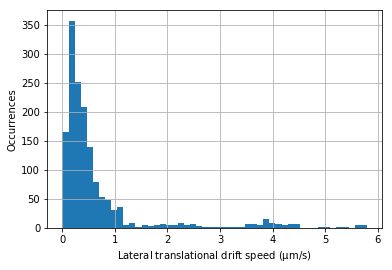

In [19]:
velocitydf.speed.hist(bins=50)
xlabel("Lateral translational drift speed ($\mathrm{\mu}$m/s)")
ylabel("Occurrences")

In [20]:
tm.head()

,x,y,relative_to_frame,x_raw,y_raw,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,,,,
1,334.271179,212.315119,0,332.555782,212.905931,2400.095318,4.244409,0.022435,26.408594,9782.0,0.113745,1,12.0
1,673.982923,253.024125,0,672.318464,253.187598,3871.088289,4.323736,0.037196,41.842188,11701.0,0.067698,1,16.0
1,461.220389,329.668033,0,459.652504,330.099069,5590.047668,4.382587,0.005051,56.246875,16907.0,0.032264,1,21.0
1,108.901070,344.408378,0,107.352006,345.282568,2439.536724,4.300599,0.051282,27.780469,8240.0,0.250852,1,24.0
1,67.245335,500.488073,0,65.892629,501.414536,2054.725786,4.132527,0.037877,26.408594,8049.0,0.294879,1,43.0


In [21]:
tracks = t1['particle'].astype(int).unique()

print size(tracks)
if size(tracks) < 400:
    print tracks

410


In [22]:
traj4 = tm[tm['particle']==tracks[4]]

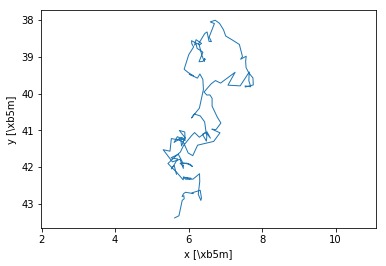

Text(0,0.5,u'x position (s)')

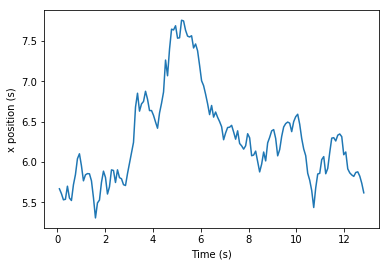

In [23]:
#plot(traj4.x*mpp, traj4.y*mpp)
#plt.axis('equal')
fig1 = plt.figure()
plt.axis('equal')
ax1 = tp.plot_traj(traj4, mpp = scaling, legend=False)
ax1.set_xlabel('x ($\mathrm{\mu}$m)')
plt.figure()
plot(traj4.frame/fps, traj4.x*mpp)
#plot(traj4.frame/fps, traj4.y*mpp)
xlabel("Time (s)")
ylabel('x position (s)')

401
101
101


Text(0.5,1,u'Raw Trajectory of some of particles')

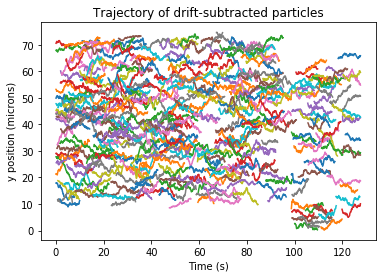

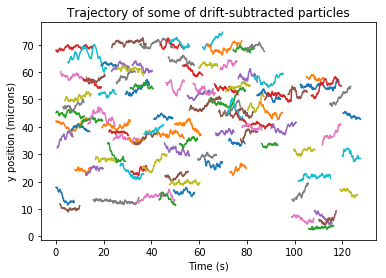

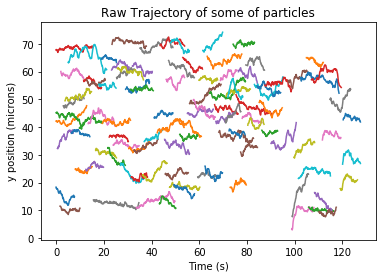

In [24]:
plt.figure()
xlabel("Time (s)")
ylabel('y position (microns)')
title('Trajectory of drift-subtracted particles')# in\n' + moviename)
count = 0
for i in tracks:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    plot(tm[tm['particle']==i].frame/fps, tm[tm['particle']==i].y*mpp)
    count = count+1
print(count)

plt.figure()
xlabel("Time (s)")
ylabel('y position (microns)')
count = 0
for i in tracks[::4]:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    plot(tm[tm['particle']==i].frame/fps, tm[tm['particle']==i].y*mpp)
    count = count+1
print(count)
title('Trajectory of some of drift-subtracted particles')# in\n' + moviename)

plt.figure()
xlabel("Time (s)")
ylabel('y position (microns)')
count = 0
for i in tracks[::4]:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    plot(t1[t1['particle']==i].frame/fps, t1[t1['particle']==i].y*mpp)
    count = count+1
print(count)
title('Raw Trajectory of some of particles')# in\n' + moviename)


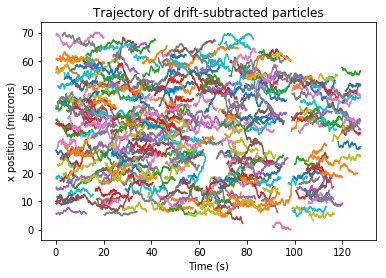

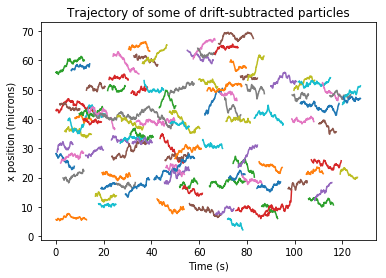

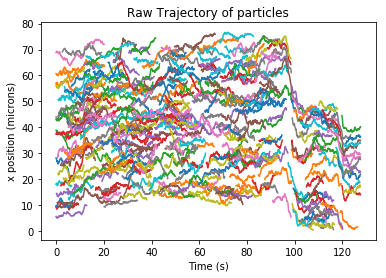

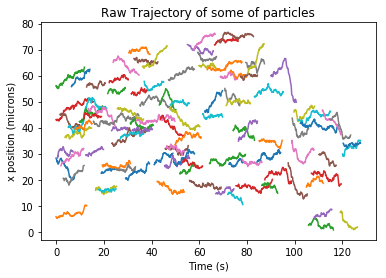

In [25]:
plt.figure()
xlabel("Time (s)")
ylabel('x position (microns)')
title('Trajectory of drift-subtracted particles')# in\n' + moviename)
for i in tracks:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    plot(tm[tm['particle']==i].frame/fps, tm[tm['particle']==i].x*mpp)

plt.figure()
xlabel("Time (s)")
ylabel('x position (microns)')
title('Trajectory of some of drift-subtracted particles')# in\n' + moviename)
for i in tracks[::4]:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    plot(tm[tm['particle']==i].frame/fps, tm[tm['particle']==i].x*mpp)
    
plt.figure()
xlabel("Time (s)")
ylabel('x position (microns)')
title('Raw Trajectory of particles')# in\n' + moviename)
for i in tracks:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    plot(t1[t1['particle']==i].frame/fps, t1[t1['particle']==i].x*mpp)
    
plt.figure()
xlabel("Time (s)")
ylabel('x position (microns)')
title('Raw Trajectory of some of particles')# in\n' + moviename)
for i in tracks[::4]:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    plot(t1[t1['particle']==i].frame/fps, t1[t1['particle']==i].x*mpp)

In [26]:
i=12
velx12 = fps*(tm[tm['particle']==i].x*mpp).diff()

#print(tm[tm['particle']==i].head())
#velx12.head()

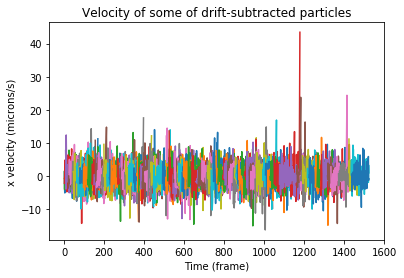

In [27]:
plt.figure()
xlabel("Time (frame)")
ylabel('x velocity (microns/s)')
title('Velocity of some of drift-subtracted particles')# in\n' + moviename)
for i in tracks[::4]:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    tm[tm['particle']==i].x*mpp
    plot(tm[tm['particle']==i].frame, fps*(tm[tm['particle']==i].x*mpp).diff())
    try:
        tmvel.append(fps*(tm[tm['particle']==i].x*mpp), ignore_index=False)
    except NameError:
        tmvel = fps*(tm[tm['particle']==i].x*mpp)
    

No problem


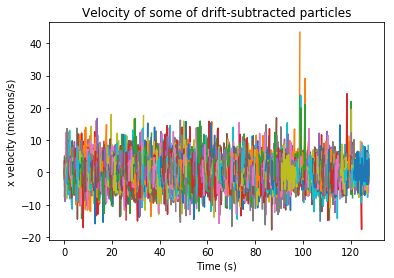

In [28]:
try:
    del(tmxvel)
except NameError:
    print('No problem')

plt.figure()
xlabel("Time (s)")
ylabel('x velocity (microns/s)')
title('Velocity of some of drift-subtracted particles')# in\n' + moviename)
for i in tracks:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    #tm[tm['particle']==i].x*mpp
    plot(tm[tm['particle']==i].frame/fps, fps*(tm[tm['particle']==i].x*mpp).diff())
    try:
        tmxvel=tmxvel.append(fps*(tm[tm['particle']==i].x*mpp).diff(), ignore_index=False)
    except NameError:
        tmxvel = fps*(tm[tm['particle']==i].x*mpp).diff()
    


In [29]:
tmxvel.describe()

count    44803.000000
mean         0.012246
std          2.984327
min        -17.804466
25%         -1.812909
50%         -0.021510
75%          1.811331
max         43.445884
Name: x, dtype: float64

Text(0,0.5,u'Occurrences')

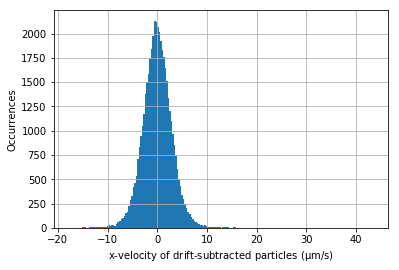

In [30]:
tmxvel.hist(bins=200)
xlabel("x-velocity of drift-subtracted particles ($\mathrm{\mu}$m/s)")
ylabel('Occurrences')

No problem


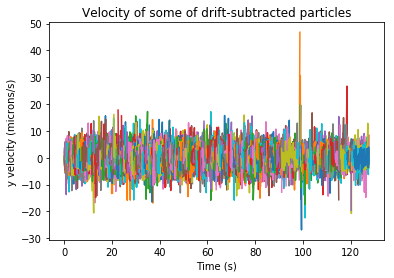

In [31]:
try:
    del(tmyvel)
except NameError:
    print('No problem')

plt.figure()
xlabel("Time (s)")
ylabel('y velocity (microns/s)')
title('Velocity of some of drift-subtracted particles')# in\n' + moviename)
for i in tracks:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    #tm[tm['particle']==i].y*mpp
    plot(tm[tm['particle']==i].frame/fps, fps*(tm[tm['particle']==i].y*mpp).diff())
    try:
        tmyvel=tmyvel.append(fps*(tm[tm['particle']==i].y*mpp).diff(), ignore_index=False)
    except NameError:
        tmyvel = fps*(tm[tm['particle']==i].y*mpp).diff()

count    44803.000000
mean        -0.001810
std          2.975322
min        -26.916616
25%         -1.824484
50%          0.011979
75%          1.824878
max         46.751098
Name: y, dtype: float64

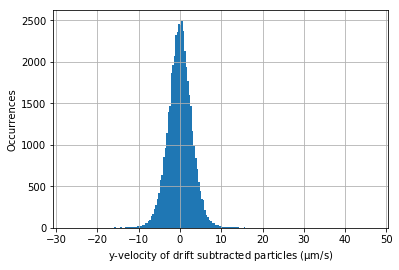

In [32]:
tmyvel.hist(bins=200)
xlabel("y-velocity of drift subtracted particles ($\mathrm{\mu}$m/s)")
ylabel('Occurrences')

tmyvel.describe()

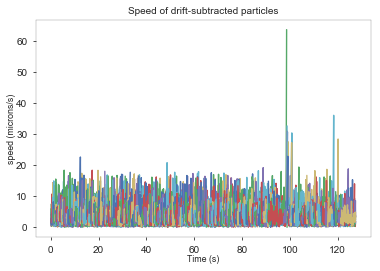

In [42]:
try:
    del(tmspeed)
except NameError:
    print('No problem')

plt.figure()
xlabel("Time (s)")
ylabel('speed (microns/s)')
title('Speed of drift-subtracted particles')# in\n' + moviename)
for i in tracks:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    #tm[tm['particle']==i].y*mpp
    plot(tm[tm['particle']==i].frame/fps, 
         fps*sqrt(((tm[tm['particle']==i].x*mpp).diff())**2+
                  ((tm[tm['particle']==i].y*mpp).diff())**2))
    try:
        tmspeed=tmspeed.append(
            fps*sqrt(((tm[tm['particle']==i].x*mpp).diff())**2
                     +((tm[tm['particle']==i].y*mpp).diff())**2),
            ignore_index=False)
        tmdisplacement=tmdisplacement.append(
            sqrt(((tm[tm['particle']==i].x*mpp).diff())**2
                     +((tm[tm['particle']==i].y*mpp).diff())**2),
            ignore_index=False)
    except NameError:
        tmspeed = fps*sqrt(((tm[tm['particle']==i].x*mpp).diff())**2
                     +((tm[tm['particle']==i].y*mpp).diff())**2)
        tmdisplacement=sqrt(((tm[tm['particle']==i].x*mpp).diff())**2
                            +((tm[tm['particle']==i].y*mpp).diff())**2)

(0, 1.5)

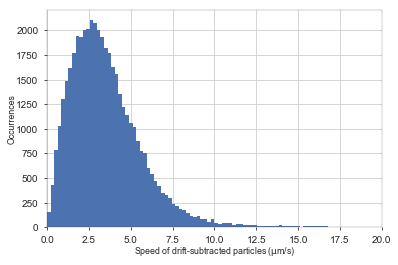

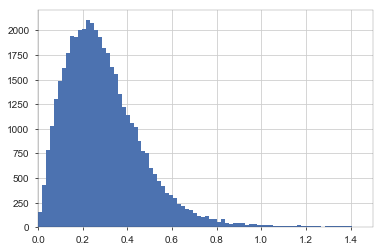

In [46]:
tmspeed.hist(bins=300)
xlabel("Speed of drift-subtracted particles ($\mathrm{\mu}$m/s)")
ylabel('Occurrences')
xlim(xmin=0,xmax=20)

tmspeed.describe()

plt.figure()
tmdisplacement.hist(bins=300)
xlim(xmin=0,xmax=1.5)

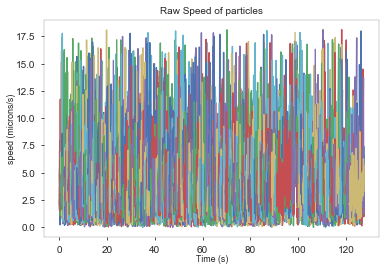

In [40]:
try:
    del(t1speed)
except NameError:
    print('No problem')
    
try:
    del(t1displacement)
except NameError:
    print('No problem')

plt.figure()
xlabel("Time (s)")
ylabel('speed (microns/s)')
title('Raw Speed of particles')# in\n' + moviename)
for i in tracks:
    if (tm[tm['particle']==i].x*mpp)[1]>80:
        continue
    #tm[tm['particle']==i].y*mpp
    plot(t1[t1['particle']==i].frame/fps, 
         fps*sqrt(((t1[t1['particle']==i].x*mpp).diff())**2+
                  ((t1[t1['particle']==i].y*mpp).diff())**2))
    try:
        t1speed=t1speed.append(
            fps*sqrt(((t1[t1['particle']==i].x*mpp).diff())**2
                     +((t1[t1['particle']==i].y*mpp).diff())**2),
            ignore_index=False)
        t1displacement = t1displacement.append(
            sqrt(((t1[t1['particle']==i].x*mpp).diff())**2
                     +((t1[t1['particle']==i].y*mpp).diff())**2),
            ignore_index=False)
    except NameError:
        t1speed = fps*sqrt(((t1[t1['particle']==i].x*mpp).diff())**2
                     +((t1[t1['particle']==i].y*mpp).diff())**2)
        t1displacement = sqrt(((t1[t1['particle']==i].x*mpp).diff())**2
                              +((t1[t1['particle']==i].y*mpp).diff())**2)

In [36]:
np.arange(0,15,.5)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5])

Drift subtracted:
count    44803.000000
mean         3.554177
std          2.264165
min          0.000000
25%          1.994944
50%          3.166472
75%          4.623917
max         63.821705
dtype: float64
Raw:
count    44817.000000
mean         3.745106
std          2.369916
min          0.004920
25%          2.079135
50%          3.331673
75%          4.883984
max         18.109529
dtype: float64


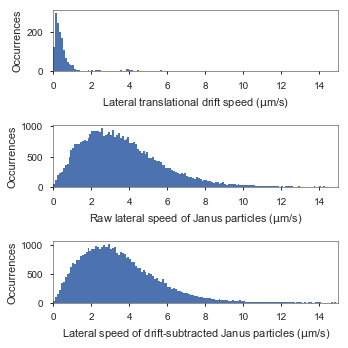

In [37]:
sns.set(style='ticks')
sns.set_context('notebook')

plt.rcParams.update({'xtick.major.size': 3 ,
                     'ytick.major.size': 3,
                     'axes.linewidth' : .5,
                     'xtick.minor.size': 1.5 ,
                     'ytick.minor.size': 1.5})

plt.subplot(3,1,1)
velocitydf.speed.hist(bins=np.arange(0,15,.1))
xlabel("Lateral translational drift speed ($\mathrm{\mu}$m/s)")
ylabel("Occurrences")
xlim(xmin=0,xmax=15)

ax=plt.gca()
ax.grid(False)

plt.subplot(3,1,3)
tmspeed.hist(bins=np.arange(0,50,.1))
xlabel("Lateral speed of drift-subtracted Janus particles ($\mathrm{\mu}$m/s)")
ylabel('Occurrences')
xlim(xmin=0,xmax=15)

ax=plt.gca()
ax.grid(False)

print("Drift subtracted:")
print(tmspeed.describe())

plt.subplot(3,1,2)
t1speed.hist(bins=np.arange(0,15,.1))
xlabel("Raw lateral speed of Janus particles ($\mathrm{\mu}$m/s)")
ylabel('Occurrences')
xlim(xmin=0,xmax=15)

ax=plt.gca()
ax.grid(False)

#xlabel("Lateral speed of particles ($\mathrm{\mu}$m/s)")

fig = plt.gcf()
thisheight=5#/1.618
thiswidth=5
fig.set_size_inches(thiswidth,thisheight)

plt.tight_layout()

print("Raw:")
print(t1speed.describe())

Drift subtracted:
count    44803.000000
mean         3.554177
std          2.264165
min          0.000000
25%          1.994944
50%          3.166472
75%          4.623917
max         63.821705
dtype: float64
Raw:
count    44817.000000
mean         3.745106
std          2.369916
min          0.004920
25%          2.079135
50%          3.331673
75%          4.883984
max         18.109529
dtype: float64


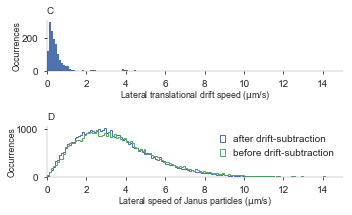

In [38]:
sns.set(style='ticks')
sns.set_context('paper')

# 10pt font
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams.update({'legend.handlelength': 0.5, 'legend.fontsize':10})
plt.rcParams.update({'axes.titlesize' : 10 })
plt.rcParams.update({'axes.linewidth' : .2, 
                     'xtick.major.size': 3 ,'ytick.major.size': 3,
                     'xtick.minor.size': 1.5 ,'ytick.minor.size': 1.5,
                     'xtick.labelsize':10, 'ytick.labelsize':10,
                     'axes.labelpad': 0})


plt.subplot(2,1,1)
velocitydf.speed.hist(bins=np.arange(0,15,.1))
xlabel("Lateral translational drift speed ($\mathrm{\mu}$m/s)")
ylabel("Occurrences")
xlim(xmin=0,xmax=15)
plt.title("C", loc='left')

ax=plt.gca()
ax.grid(False)

plt.subplot(2,1,2)
tmspeed.hist(bins=np.arange(0,50,.1), histtype='step', label="after drift-subtraction", linewidth=1)
#xlabel("Lateral speed of drift-subtracted Janus particles ($\mathrm{\mu}$m/s)")
#ylabel('Occurrences')
xlim(xmin=0,xmax=15)

ax=plt.gca()
ax.grid(False)

print("Drift subtracted:")
print(tmspeed.describe())

#plt.subplot(3,1,2)
t1speed.hist(bins=np.arange(0,15,.1), histtype='step', label="before drift-subtraction", linewidth=1)
xlabel("Lateral speed of Janus particles ($\mathrm{\mu}$m/s)")
ylabel('Occurrences')
xlim(xmin=0,xmax=15)
plt.legend()
plt.title("D", loc='left')

ax=plt.gca()
ax.grid(False)

#xlabel("Lateral speed of particles ($\mathrm{\mu}$m/s)")

fig = plt.gcf()
thisheight=5/1.618
thiswidth=5
fig.set_size_inches(thiswidth,thisheight)

sns.despine();

plt.tight_layout()

print("Raw:")
print(t1speed.describe())

Drift subtracted:
count    44803.000000
mean         3.554177
std          2.264165
min          0.000000
25%          1.994944
50%          3.166472
75%          4.623917
max         63.821705
dtype: float64
Raw:
count    44817.000000
mean         3.745106
std          2.369916
min          0.004920
25%          2.079135
50%          3.331673
75%          4.883984
max         18.109529
dtype: float64
pdf saved


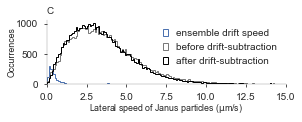

In [64]:
sns.set(style='ticks')
sns.set_context('paper')

# 10pt font
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams.update({'legend.handlelength': 0.5, 'legend.fontsize':10})
plt.rcParams.update({'axes.titlesize' : 10 })
plt.rcParams.update({'axes.linewidth' : .2, 
                     'xtick.major.size': 3 ,'ytick.major.size': 3,
                     'xtick.minor.size': 1.5 ,'ytick.minor.size': 1.5,
                     'xtick.labelsize':10, 'ytick.labelsize':10,
                     'axes.labelpad': 0})


plt.figure()
velocitydf.speed.hist(bins=np.arange(0,15,.1),histtype='step', label="ensemble drift speed", linewidth=1)
xlabel("Lateral translational drift speed ($\mathrm{\mu}$m/s)")
ylabel("Occurrences")
xlim(xmin=0,xmax=15)
plt.title("C", loc='left')

ax=plt.gca()
ax.grid(False)

#plt.subplot(3,1,2)
t1speed.hist(bins=np.arange(0,15,.1), histtype='step', label="before drift-subtraction", linewidth=1, color="#7a7a7aff")
xlabel("Lateral speed of Janus particles ($\mathrm{\mu}$m/s)")
ylabel('Occurrences')
xlim(xmin=0,xmax=15)

#plt.title("D", loc='left')
ax=plt.gca()
ax.grid(False)

#plt.subplot(2,1,2)
tmspeed.hist(bins=np.arange(0,50,.1), histtype='step', label="after drift-subtraction", linewidth=1, color="k")
#xlabel("Lateral speed of drift-subtracted Janus particles ($\mathrm{\mu}$m/s)")
#ylabel('Occurrences')
xlim(xmin=0,xmax=15)

ax=plt.gca()
ax.grid(False)

print("Drift subtracted:")
print(tmspeed.describe())

plt.legend()

#xlabel("Lateral speed of particles ($\mathrm{\mu}$m/s)")

fig = plt.gcf()
thisheight=1.8
thiswidth=4.3
fig.set_size_inches(thiswidth,thisheight)

sns.despine();

plt.tight_layout()

print("Raw:")
print(t1displacement.describe())

os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\paperfigures')
try:
    plt.savefig('particle_speed,' + moviename + '.pdf', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    print('pdf saved')
    plt.savefig('particle_speed,' + moviename + '.png', 
                bbox_inches='tight', dpi=600, figsize=(thiswidth, thisheight))
    plt.savefig('particle_speed,' + moviename + '.svg', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
except IOError:
    print('Close the pdf file so I can overwrite it.')

In [67]:
t1displacement.head()

frame
0         NaN
1    0.448386
2    0.080543
3    0.481516
4    0.520721
dtype: float64

Drift subtracted:
count    44803.000000
mean         3.554177
std          2.264165
min          0.000000
25%          1.994944
50%          3.166472
75%          4.623917
max         63.821705
dtype: float64
Raw:
count    44817.000000
mean         0.313792
std          0.198569
min          0.000412
25%          0.174205
50%          0.279151
75%          0.409215
max          1.517346
dtype: float64
pdf saved


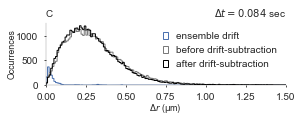

In [76]:
# *** come back one I've replaced drift.speed
sns.set(style='ticks')
sns.set_context('paper')

# 10pt font
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams.update({'legend.handlelength': 0.5, 'legend.fontsize':10})
plt.rcParams.update({'axes.titlesize' : 10 })
plt.rcParams.update({'axes.linewidth' : .2, 
                     'xtick.major.size': 2 ,'ytick.major.size': 2,
                     'xtick.minor.size': .5 ,'ytick.minor.size': .5,
                     'xtick.labelsize':10, 'ytick.labelsize':10,
                     'axes.labelpad': 0})

binsequence=np.arange(0,15,.01)

plt.figure()
drift.distance.hist(bins=binsequence,histtype='step', label="ensemble drift", linewidth=1)
xlabel("Translational drift ($\mathrm{\mu}$m)")
ylabel("Occurrences")
xlim(xmin=0,xmax=15)
plt.title("C", loc='left')
title("$\Delta{}t = 0.084$ sec", loc='right')

ax=plt.gca()
ax.grid(False)

#plt.subplot(3,1,2)
t1displacement.hist(bins=binsequence, histtype='step', label="before drift-subtraction", linewidth=1, color="#7a7a7aff")
#xlabel("Distance Janus particles move ($\mathrm{\mu}$m)")
xlabel("$\Delta r$ ($\mathrm{\mu}$m)")
ylabel('Occurrences')
#xlim(xmin=0,xmax=15)

#plt.title("D", loc='left')
ax=plt.gca()
ax.grid(False)

#plt.subplot(2,1,2)
tmdisplacement.hist(bins=binsequence, histtype='step', label="after drift-subtraction", linewidth=1, color="k")
#xlabel("Lateral speed of drift-subtracted Janus particles ($\mathrm{\mu}$m/s)")
#ylabel('Occurrences')
#xlim(xmin=0,xmax=15)

ax=plt.gca()
ax.grid(False)

print("Drift subtracted:")
print(tmspeed.describe())

xlim(0,1.5)
plt.legend()

#xlabel("Lateral speed of particles ($\mathrm{\mu}$m/s)")

fig = plt.gcf()
thisheight=1.8
thiswidth=4.3
fig.set_size_inches(thiswidth,thisheight)

sns.despine();

plt.tight_layout()

print("Raw:")
print(t1displacement.describe())

os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\paperfigures')
try:
    plt.savefig('particle_displacement,' + moviename + '.pdf', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    print('pdf saved')
    plt.savefig('particle_displacement,' + moviename + '.png', 
                bbox_inches='tight', dpi=600, figsize=(thiswidth, thisheight))
    plt.savefig('particle_displacement,' + moviename + '.svg', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
except IOError:
    print('Close the pdf file so I can overwrite it.')

In [74]:
fps

11.935

In [75]:
1/fps

0.0837871805613741

comparing full movie to drifty end of movie


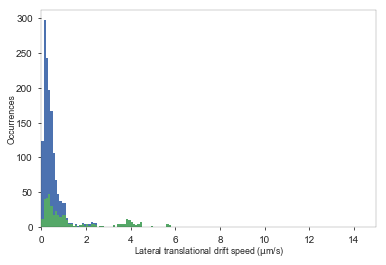

In [40]:
plt.figure()

velocitydf.speed.hist(bins=np.arange(0,15,.1))
xlabel("Lateral translational drift speed ($\mathrm{\mu}$m/s)")
ylabel("Occurrences")
xlim(xmin=0,xmax=15)

ax=plt.gca()
ax.grid(False)

#plt.figure()
velocitydf['frame']=d.index
driftyvel = velocitydf[velocitydf.frame> 1100]
print('comparing full movie to drifty end of movie')
driftyvel.speed.hist(bins=np.arange(0,15,.1))
xlabel("Lateral translational drift speed ($\mathrm{\mu}$m/s)")
ylabel("Occurrences")
xlim(xmin=0,xmax=15)

ax=plt.gca()
ax.grid(False)


In [41]:
velocitydf.head()

,x,y,speed,frame
time (s),,,,
0.083787,NaN,NaN,NaN,1
0.167574,-0.950854,0.409764,1.035389,2
0.251362,-0.934609,0.112230,0.941323,3
0.335149,-1.020727,-0.332750,1.073595,4
0.418936,-0.986179,-0.498281,1.104913,5


In [42]:
velocitydf.tail()

,x,y,speed,frame
time (s),,,,
127.188940,0.296081,-0.068589,0.303921,1518
127.272727,0.289215,-0.182263,0.341855,1519
127.356514,0.416275,-0.265348,0.493654,1520
127.440302,0.285373,-0.324068,0.431808,1521
127.524089,0.180815,-0.302582,0.352491,1522


In [43]:
t1.head()

,x,y,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,335.207851,217.515802,2129.606663,4.263106,0.015743,24.735661,9744.0,0.121135,0,12.0
1,332.555782,212.905931,2400.095318,4.244409,0.022435,26.408594,9782.0,0.113745,1,12.0
2,331.783522,213.468283,1931.747908,4.380896,0.028253,19.208907,9288.0,0.140322,2,12.0
3,326.338060,211.746241,2027.142279,4.355480,0.054004,22.236171,9256.0,0.145731,3,12.0
4,320.591582,209.482554,2178.229462,4.276222,0.004696,22.954505,9362.0,0.137708,4,12.0


In [44]:
t1_drifty = t1[t1['frame'] > 1100]
tm_drifty = tm[tm['frame'] > 1100]

Text(0,0.5,u'pixels')

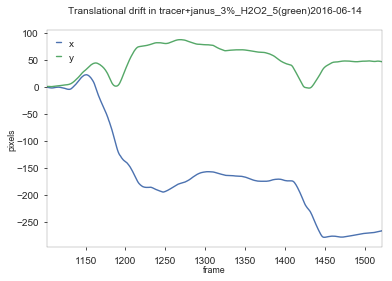

In [45]:
d_drifty = tp.compute_drift(t1_drifty, smoothing=15)

#plt.figure()
d_drifty.plot(grid=False)
plt.title('Translational drift in ' + moviename + '\n')
plt.ylabel('pixels')

Text(0.5,1,u"Translational drift in tracer+janus_3%_H2O2_5(green)2016-06-14\nShould be none, and that's true")

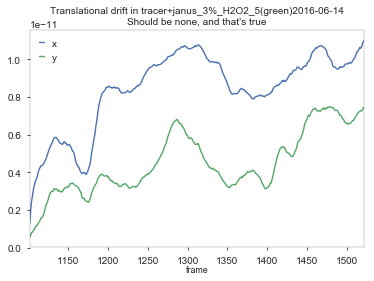

In [46]:
d_tmdrifty = tp.compute_drift(tm_drifty, smoothing=15)

#plt.figure()
d_tmdrifty.plot(grid=False)
plt.title('Translational drift in ' + moviename + '\n' + 'Should be none, and that\'s true')

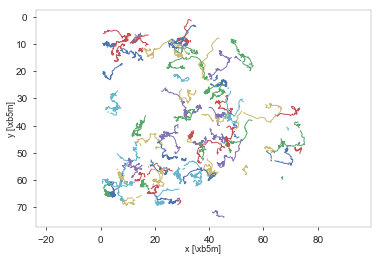

Text(0.5,16.2,u'x ($\\mu$m)')

In [47]:
fig1 = plt.figure()
plt.axis('equal')
ax1 = tp.plot_traj(t1_drifty, mpp = scaling, legend=False)
ax1.set_xlabel('x ($\mu$m)')

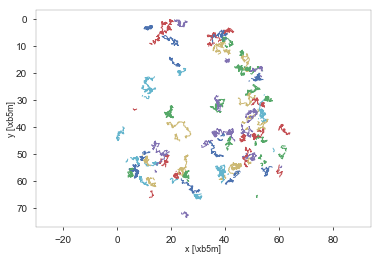

In [48]:
fig2 = plt.figure()
plt.axis('equal')
ax2 = tp.plot_traj(tm_drifty, mpp = scaling, legend=False)

In [49]:
size(tm_drifty['particle'].astype(int).unique())

88

Figure 3 in EPJ paper
pdf saved


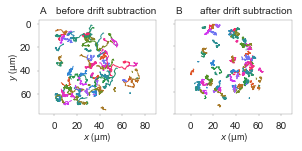

In [50]:
import seaborn as sns
sns.set(style='ticks')
sns.set_context('paper')
sns.set_palette(sns.husl_palette(22,l=.55))

# Big font
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams.update({'legend.handlelength': 0})
plt.rcParams.update({'axes.titlesize' : 10 })
plt.rcParams.update({'axes.linewidth' : .2, 
                     'xtick.major.size': 2 ,'ytick.major.size': 2, 
                     'xtick.labelsize':10, 'ytick.labelsize':10})


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)

#plt.subplot(1,2, 2)
#ax2 = plt.gca()
plt.axis('equal')
tp.plot_traj(tm_drifty, mpp = scaling, legend=False, ax=ax2)
#tick_params( which='both', pad=2)

#plt.subplot(1,2, 1)
#fig = plt.gcf()
#ax1 = plt.gca()
#plt.figsize=(8,10)

tp.plot_traj(t1_drifty, mpp = scaling, legend=False, ax=ax1)
#tick_params( which='both', pad=2)
plt.axis('equal')


ax1.set_title('A', loc='left')
ax2.set_title('B', loc='left')

plt.rcParams.update({'axes.titlesize' : 10 })
ax1.set_title('before drift-subtraction', loc='right')
ax2.set_title('after drift-subtraction', loc='right')

ax1.set_ylabel('$y$ ($\mathrm{\mu}$m)')
ax1.set_xlabel('$x$ ($\mathrm{\mu}$m)')
ax2.set_xlabel('$x$ ($\mathrm{\mu}$m)')
ax2.set_ylabel('')

plt.xticks(np.arange(0,120, step=20)) # order I call this matters
plt.yticks(np.arange(0,81, step=20))

#fig.subplots_adjust(hspace=0)

plt.xlim(xmax=80)
#plt.ylim()

print('Figure 3 in EPJ paper')

thisheight=2.2
thiswidth=4.3
fig.set_figheight(thisheight)
fig.set_figwidth(thiswidth)

ax1.tick_params(width=.2)
ax2.tick_params(width=.2)


plt.tight_layout()


os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\paperfigures')
try:
    plt.savefig('t1_and_tm_drifty,' + moviename + '.pdf', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    plt.savefig('t1_and_tm_drifty,' + moviename + '.svg', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    print('pdf saved')
    plt.savefig('t1_and_tm_drifty,' + moviename + '.png', 
                bbox_inches='tight', dpi=600, figsize=(thiswidth, thisheight))
except IOError:
    print('Close the pdf file so I can overwrite it.')


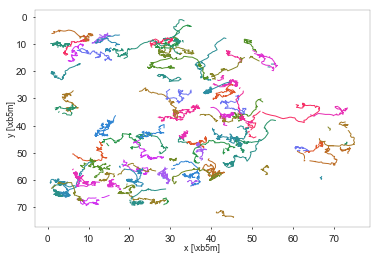

In [51]:
tp.plot_traj(t1_drifty, mpp = scaling, legend=False)

Text(0.5,1,u'Translational drift in tracer+janus_no_H2O2_3(red)2016-06-14\n')

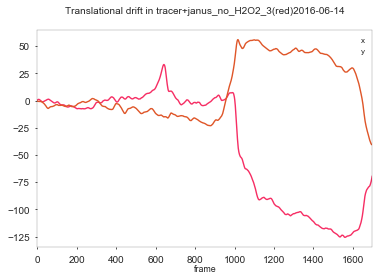

In [52]:
d_driftycontrol = tp.compute_drift(t1control, smoothing=15)

#plt.figure()
d_driftycontrol.plot(grid=False)
plt.title('Translational drift in ' + controlmoviename + '\n')

In [53]:
t1control_drifty = t1control[t1control['frame'] > 900]
tmcontrol_drifty = tmcontrol[tmcontrol['frame'] > 900]
t1control_drifty = t1control_drifty[t1control_drifty['frame'] < 1100]
tmcontrol_drifty = tmcontrol_drifty[tmcontrol_drifty['frame'] < 1100]

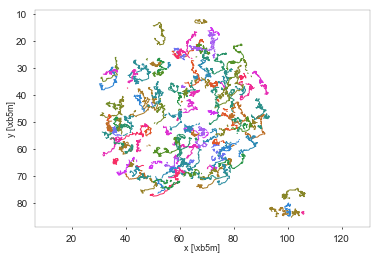

In [54]:
plt.axis('equal')
ax = tp.plot_traj(t1control_drifty, mpp = scaling, legend=False)

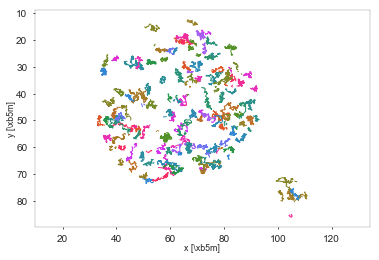

In [55]:
plt.axis('equal')
ax = tp.plot_traj(tmcontrol_drifty, mpp = scaling, legend=False)

This shows that the control drifts too, which makes sense since the oil can evaporate.